## <b> Problem Statement </b>

> Indented block


###You are the data scientist at a telecom company named “Neo” whose customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.


### **What is customers churn?**
###Customer churn,refers to the rate at which customers stop doing business with a company over a specific period of time. Churn can occur in various industries and businesses, including retail, telecommunications, software as a service (SaaS), and more. It is a crucial metric for companies because retaining existing customers is often more cost-effective than acquiring new ones.

## <b> Importing necessary libraries and data

### Necessary Libraries

In [ ]:
# handle table-like data and matrices
import pandas as pd
import numpy as np
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# evaluations
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import  RandomizedSearchCV
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Data Importing

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing data
data=pd.read_csv('/content/drive/MyDrive/datasets/customer_churn.csv')

## <b> Data Reading

In [ ]:
#Displaying first five rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Making copy of data
df=data.copy()

In [ ]:
data.shape

(7043, 21)

In [ ]:
# Visualize column names
col=data.columns
print("Features:",col)

Features: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Checking unique values of each column
for column in col:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

### <b>  Data Information: </b>
* ### Gender: Whether the client is a female or a male.
* ### SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
* ### Partner: Whether the client has a partner or not (Yes, No).
* ### Dependents: Whether the client has dependents or not (Yes, No).
* ### tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
* ### PhoneService: Whether the client has a phone service or not (Yes, No).
* ### MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
* ### InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
* ### OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
* ### OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
* ### DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
* ### TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
* ### StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
* ### StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).
* ### Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
* ### PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
* ### PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
* ### MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
* ### TotalCharges: The total amount charged to the customer (Multiple different numeric values).
* ### Churn: Whether customer churn or not (No, Yes)


<b> The customer churn dataset contains total 7043 observations(rows) and total 21 columns out of which 19 features are independent and 'Churn' is dependent feature.

## <b> Exploratory Data Analysis and Data Cleaning

In [ ]:
# Missing Values/Null Values Count
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Duplicate Value Count
len(data[data.duplicated()])

0

In [ ]:
# Summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<b> There are no null values and duplicate values in the given dataset, but we can observe that column 'TotalCharges' is wrongly detected as an object. This column represents the total amount charged to the customer and therefore, it must be a numeric variable. For further analysis, we need to transform this column into a numeric data type.

In [ ]:
# Transforming TotalCharges column to numerical values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# errors='coerce' parameter means that if any conversion errors occur,
#the problematic values will be converted to NaN

In [ ]:
# Checking null values after conversion of TotalCharges
data['TotalCharges'].isnull().sum()

11

After conversion of TotalCharges column to numeric value there are 11 NaN values in the same column. we will drop those rows containing null values.

In [ ]:
# drop observations with null values
data.dropna(inplace=True)

In [ ]:
# Droping customerID column and checking shape
data.drop(columns='customerID',inplace=True)

In [ ]:
#Getting shape of the data after deleting rows and columns
data.shape

(7032, 20)

## <b> Data Manipulation

In [ ]:
# Extracting  5th row and store it in ‘customer_5’
customer_5 = data.iloc[4]
print(customer_5)

gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                             2
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                  70.7
TotalCharges                  151.65
Churn                            Yes
Name: 4, dtype: object


In [ ]:
# Extracting the 15th row and store it in ‘customer_15’
customer_15 = data.iloc[14]
print(customer_15)

gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                            25
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                   Yes
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 105.5
TotalCharges                 2686.05
Churn                             No
Name: 14, dtype: object


In [ ]:
#Extracting all the male senior citizens whose payment method is electronic check and
#store the result in ‘senior_male_electronic’
senior_male_electronic=data[(data['gender']=='Male') & (data['SeniorCitizen']==1) &(data['PaymentMethod']=='Electronic check')]
print(senior_male_electronic)

     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
20     Male              1      No         No       1           No   
55     Male              1      No         No      18          Yes   
57     Male              1     Yes        Yes      66          Yes   
78     Male              1      No         No      30          Yes   
91     Male              1      No         No       1          Yes   
...     ...            ...     ...        ...     ...          ...   
6837   Male              1      No         No       6          Yes   
6894   Male              1     Yes         No       3          Yes   
6914   Male              1     Yes         No      43          Yes   
6967   Male              1      No         No      25          Yes   
7032   Male              1      No         No       1          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
20    No phone service             DSL             No           No   
55                 

In [ ]:
#Extracting all those customers whose tenure is greater than 70 months or their monthly charges is
#more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure=data[(data['tenure']>70) | (data['MonthlyCharges']>100)]
print(customer_total_tenure)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8     Female              0     Yes         No      28          Yes   
12      Male              0     Yes         No      58          Yes   
13      Male              0      No         No      49          Yes   
14      Male              0      No         No      25          Yes   
15    Female              0     Yes        Yes      69          Yes   
...      ...            ...     ...        ...     ...          ...   
7023  Female              1     Yes         No      63          Yes   
7034  Female              0      No         No      67          Yes   
7037  Female              0      No         No      72          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
8              Yes     Fiber optic                   No            

In [ ]:
#Extract all the customers whose contract is of two years, payment method is mailed check and
#the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

two_mail_yes = data[
    (data['Contract'] == 'Two year') &
    (data['PaymentMethod'] == 'Mailed check') &
    (data['Churn'] == 'Yes')
]
print(two_mail_yes)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
268     Male              0      No         No      59          Yes   
5947  Female              0     Yes        Yes      33          Yes   
6680  Female              0      No        Yes      48          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
268             No              No  No internet service  No internet service   
5947           Yes              No  No internet service  No internet service   
6680            No     Fiber optic                   No                  Yes   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year    

In [ ]:
#Extracting 333 random records from the customer_churndataframe and store the result in ‘customer_333’
import random
# Set a seed for reproducibility
random.seed(8)

# Get 333 random records
customer_333 =data.sample(n=333)
customer_333.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
355,Female,0,No,No,10,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),80.25,846.00,Yes
5944,Male,0,No,No,12,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,56.65,654.85,Yes
1734,Male,0,No,No,9,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.40,418.80,Yes
6835,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,No
3226,Male,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.75,141.10,No


In [ ]:
#Get the count of different levels from the ‘Churn’ column
data['Churn'].value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

## Data Visualization:

**Building a bar-plot for the ’InternetService’ column:**

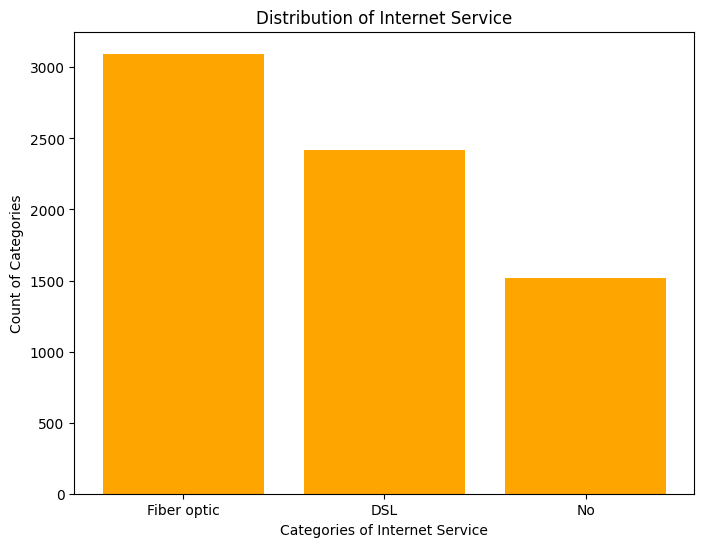

In [ ]:
# Counting the categories in the 'InternetService' column
internet_service_counts = data['InternetService'].value_counts()

# bar plot
plt.figure(figsize=(8, 6))
plt.bar(internet_service_counts.index, internet_service_counts.values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()


**Building a histogram for the ‘tenure’ column**

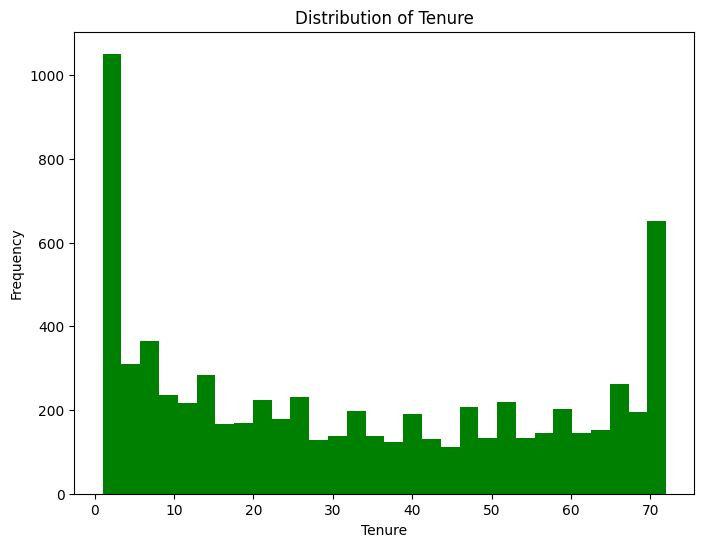

In [ ]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(data['tenure'], bins=30, color='green')

# Set labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Show the histogram
plt.show()

Building a scatter-plot between ‘MonthlyCharges’ and ‘tenure’.


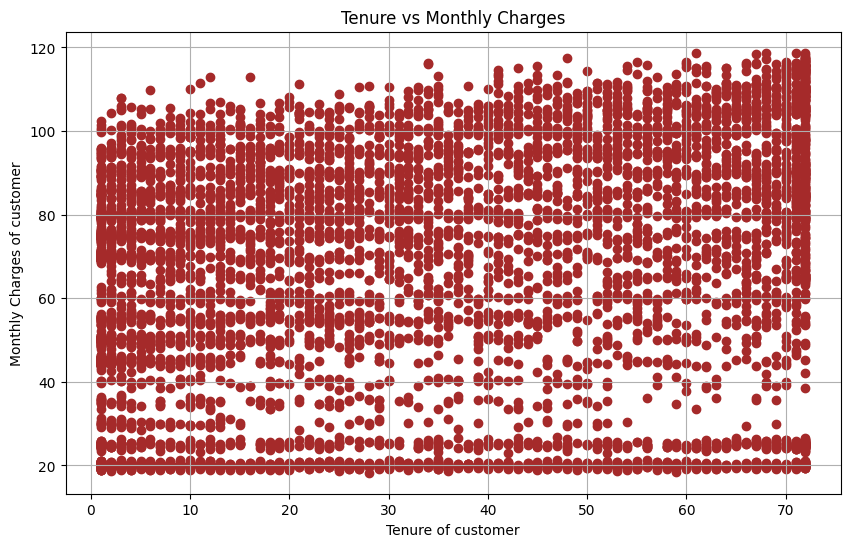

In [ ]:
#Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], c='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.grid(True)
plt.show()

Building a box-plot between ‘tenure’ & ‘Contract’.

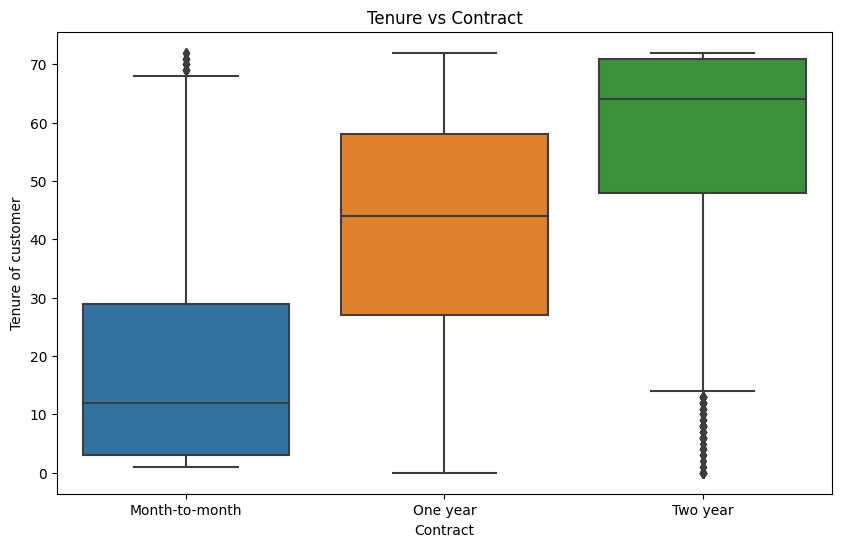

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Tenure vs Contract')

plt.show()

# Model Fitting

### <b> Linear Model :
Building a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

In [ ]:
# Spliting the dataset into a training set and a test set (70:30 ratio)
X = data[['tenure']]
y = data['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# Building the linear regression model on the training set
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicting the values on the test set
y_pred = reg_model.predict(X_test)

# Calculating the root mean square error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
error = rmse

print(f'\033[1mRoot Mean Square Error\033[0m: {rmse}')



Root Mean Square Error: 29.358329570933197


### Logistic Regression:
Building a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:

In [ ]:
#Handeling categorical value
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [ ]:
# Spliting the dataset into a training set and a test set (65:35 ratio)
X = df[['MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)

In [ ]:
# Fitting logistic regression model
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction on the test set
y_pred = logit.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#Confusion Matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f'\033[1mAccuracy Score\033[0m: {accuracy}')

Confusion Matrix:
[[1810    0]
 [ 656    0]]
Accuracy Score: 0.7339821573398215


###  Multiple logistic model:

Building multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’

In [ ]:
# Split the dataset into a training set and a test set (80:20 ratio)
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [ ]:
#Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 ... 0 1 0]


In [ ]:
#Confusion Matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f'\033[1mAccuracy Score\033[0m: {accuracy}')

Confusion Matrix:
[[926 101]
 [223 159]]
Accuracy Score: 0.7700496806245565


### Decision Tree:
Building a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:


In [ ]:
# Split the dataset into a training set and a test set (80:20 ratio)
X = df[['tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [ ]:
#Model Building
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Prediction on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
#Confusion Matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f'\033[1mAccuracy Score\033[0m: {accuracy}')

Confusion Matrix:
[[987  40]
 [313  69]]
Accuracy Score: 0.7494677075940384


### Random Forest:
Building Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:

In [ ]:
# Split the dataset into a training set and a test set (70:30 ratio)
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)

In [ ]:
#Model Building
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prediction on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 ... 1 0 0]


In [ ]:
#Confusion Matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f'\033[1mAccuracy Score\033[0m: {accuracy}')

Confusion Matrix:
[[1311  233]
 [ 315  254]]
Accuracy Score: 0.7406530998580217
